In [6]:
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
cat4=cv2.imread("CATS_DOGS/train/CAT/4.jpg")

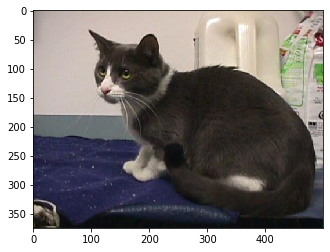

In [5]:
cat4=cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)
plt.imshow(cat4)

In [8]:
cat4.shape

(375, 500, 3)

In [13]:
dog=cv2.imread("CATS_DOGS/train/DOG/2.jpg")

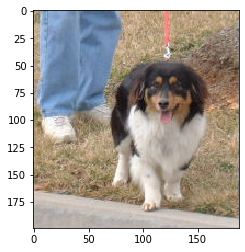

In [14]:
dog=cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)
plt.imshow(dog)

In [15]:
dog.shape

(199, 188, 3)

In [16]:
from keras.preprocessing.image import ImageDataGenerator

In [20]:
"""
rotation_range=30: randomly rotate image angle from 0 to 30 degree
width_shift_range=0.1: randomly stretch the image along x_axis from 0 to 10%
height_shift_range=0.1: randomly stretch the image along y_axis from 0 to 10%
rescale=1/255: rescale image to the range from 0 to 1
shear_range=0.2: randomly crop the image from 0 to 20%
zoom_range=0.2: randomly zoom the image from 0 to 20%
horizontal_flip=True: randomly flip the image in horizontal direction
fill_mode="nearest": During the random image processing, we will fill in the mixing pixels with the nearset ones if they are missing 
"""
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode="nearest")

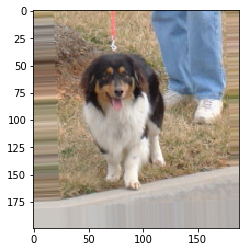

In [26]:
plt.imshow(image_gen.random_transform(dog))

In [27]:
image_gen.flow_from_directory("CATS_DOGS/train")

Found 18743 images belonging to 2 classes.


In [36]:
input_shape = (150,150,3)

In [37]:
from keras.models import Sequential

In [44]:
from keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D

In [61]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation="relu"))

# Randomly turon 50% of the neurons during training to avoid overfitting
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss = "binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 18496)             0         
__________

In [63]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory("CATS_DOGS/train/",
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode="binary")

Found 18743 images belonging to 2 classes.


In [64]:
test_image_gen = image_gen.flow_from_directory("CATS_DOGS/test/",
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode="binary")

Found 6251 images belonging to 2 classes.


In [65]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [66]:
results=model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=150,
                           validation_data=test_image_gen,validation_steps=12)

Epoch 1/1
150/150 [==============================] - 139s 927ms/step - loss: 0.6989 - acc: 0.5262 - val_loss: 0.6961 - val_acc: 0.5156


In [67]:
results.history["acc"]

[0.52625]

In [1]:
from keras.models import load_model

Using TensorFlow backend.


In [2]:
model = load_model("cat_dog_100epochs.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [3]:
import numpy as np

def show_result(test_image):
    test_image = cv2.resize(test_image,(150,150))
    test_image = test_image/255
    
    
    
    prediction = model.predict_classes(test_image)
    
    if prediction.max()==1:
        return "DOG"
    else:
        return "CAT"

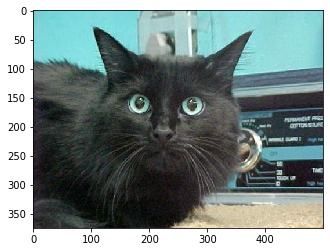

In [9]:
import numpy as np
import cv2

rand =np.random.randint(9500,12499)
test_image = cv2.imread("CATS_DOGS/test/CAT/{}.jpg".format(str(rand)))
plt.imshow(test_image)

In [10]:
show_result(test_image)

'CAT'